In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%config IPCompleter.greedy=True

In [2]:
member = pd.read_csv("./member.csv")

In [12]:
from IPython.display import display, HTML


# HTML 테이블로 변환 후 스크롤 영역 지정
html = member.head().to_html()
scrollable_html = f"""
<div style='height:400px; overflow:auto;'>
{html}
</div>
"""

display(HTML(scrollable_html))

,기준년월,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,회원여부_연체,이용거절여부_카드론,동의여부_한도증액안내,수신거부여부_TM,수신거부여부_DM,수신거부여부_메일,수신거부여부_SMS,가입통신회사코드,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급6개월이내,탈회횟수_발급1년이내,거주시도명,직장시도명,마케팅동의여부,유효카드수_신용체크,유효카드수_신용,유효카드수_신용_가족,유효카드수_체크,유효카드수_체크_가족,이용가능카드수_신용체크,이용가능카드수_신용,이용가능카드수_신용_가족,이용가능카드수_체크,이용가능카드수_체크_가족,이용카드수_신용체크,이용카드수_신용,이용카드수_신용_가족,이용카드수_체크,이용카드수_체크_가족,이용금액_R3M_신용체크,이용금액_R3M_신용,이용금액_R3M_신용_가족,이용금액_R3M_체크,이용금액_R3M_체크_가족,_1순위카드이용금액,_1순위카드이용건수,_1순위신용체크구분,_2순위카드이용금액,_2순위카드이용건수,_2순위신용체크구분,최종유효년월_신용_이용가능,최종유효년월_신용_이용,최종카드발급일자,보유여부_해외겸용_본인,이용가능여부_해외겸용_본인,이용여부_3M_해외겸용_본인,보유여부_해외겸용_신용_본인,이용가능여부_해외겸용_신용_본인,이용여부_3M_해외겸용_신용_본인,연회비발생카드수_B0M,연회비할인카드수_B0M,기본연회비_B0M,제휴연회비_B0M,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201812,SYN_0,2,40대,07,_,1,1,0,1,1,1,20130101,71,0,0,1,0,0,0,0,LGT,1.0,66.0,0.0,0.0,경기,경기,1.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-45419.0,-45419.0,0.0,0.0,0.0,302789.0,25.0,신용,0.0,0.0,체크,202105.0,202108.0,20160912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.자녀성장기(2),27.0
1,201812,SYN_1,1,30대,_,1,1,1,1,1,1,1,20170801,16,0,0,0,0,0,0,0,KTF,1.0,103.0,0.0,0.0,서울,서울,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,708989.0,708989.0,0.0,0.0,0.0,725968.0,31.0,신용,0.0,0.0,NaN,202112.0,202202.0,20170122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),23.0
2,201812,SYN_2,2,40대,_,_,1,1,1,1,1,1,20180601,6,0,0,0,0,0,0,0,SKT,1.0,49.0,0.0,0.0,충남,충남,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,314212.0,314212.0,0.0,0.0,0.0,256258.0,3.0,신용,0.0,0.0,NaN,202212.0,202210.0,20180227.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),10.0
3,201812,SYN_3,1,40대,_,_,1,1,1,1,2,2,20060301,153,0,0,0,1,1,1,0,SKT,0.0,0.0,0.0,0.0,충남,충남,1.0,3.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,169131.0,169131.0,0.0,0.0,0.0,82890.0,7.0,신용,151535.0,7.0,신용,202002.0,202005.0,20141231.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),48.0
4,201812,SYN_4,2,40대,_,_,0,0,0,1,1,0,20120501,79,0,0,0,1,1,1,1,KTF,0.0,0.0,0.0,0.0,부산,부산,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,신용,0.0,0.0,NaN,NaN,NaN,20170206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.자녀성장기(2),22.0


In [4]:
member

,기준년월,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201812,SYN_0,2,40대,07,_,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.자녀성장기(2),27.0
1,201812,SYN_1,1,30대,_,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),23.0
2,201812,SYN_2,2,40대,_,_,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),10.0
3,201812,SYN_3,1,40대,_,_,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),48.0
4,201812,SYN_4,2,40대,_,_,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.자녀성장기(2),22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365947,201812,SYN_365947,1,30대,_,_,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.자녀출산기,31.0
365948,201812,SYN_365948,2,30대,_,_,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),14.0
365949,201812,SYN_365949,2,30대,_,_,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.자녀출산기,0.0
365950,201812,SYN_365950,1,50대,_,_,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.자녀성장기(2),10.0


In [5]:
member.describe()

,기준년월,남녀구분코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,입회일자_신용,입회경과개월수_신용,...,할인금액_기본연회비_B0M,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,최종카드발급경과월
count,365952.0,365952.000000,365952.000000,365952.000000,365952.000000,365952.000000,365952.000000,365952.000000,3.659520e+05,365952.00000,...,365951.0,365951.0,365951.000000,365951.000000,365951.0,365951.0,365951.0,365951.0,365951.000000,365951.000000
mean,201812.0,1.475494,0.946788,0.870846,0.621245,0.972297,1.241797,1.146432,2.012269e+07,75.13681,...,0.0,0.0,0.169140,2.181052,0.0,0.0,0.0,0.0,0.027927,23.555044
std,0.0,0.499400,0.224456,0.335370,0.485078,0.164121,0.586676,0.629727,6.038706e+04,72.30365,...,0.0,0.0,38.371901,446.084640,0.0,0.0,0.0,0.0,0.164765,13.990634
min,201812.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.991040e+07,6.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,201812.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.010030e+07,18.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,13.000000
50%,201812.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.014070e+07,53.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,21.000000
75%,201812.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.017060e+07,105.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,33.000000
max,201812.0,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.018060e+07,332.00000,...,0.0,0.0,10693.000000,95003.000000,0.0,0.0,0.0,0.0,1.000000,64.000000


In [13]:
missing = member.isnull().sum() #결측치를 확인해봄 
print("결측치 현황:", missing[missing > 0])

결측치 현황: 가입통신회사코드               57124
탈회횟수_누적                    1
최종탈회후경과월                   1
탈회횟수_발급6개월이내               1
탈회횟수_발급1년이내                1
거주시도명                      1
직장시도명                  37989
마케팅동의여부                    1
유효카드수_신용체크                 1
유효카드수_신용                   1
유효카드수_신용_가족                1
유효카드수_체크                   1
유효카드수_체크_가족                1
이용가능카드수_신용체크               1
이용가능카드수_신용                 1
이용가능카드수_신용_가족              1
이용가능카드수_체크                 1
이용가능카드수_체크_가족              1
이용카드수_신용체크                 1
이용카드수_신용                   1
이용카드수_신용_가족                1
이용카드수_체크                   1
이용카드수_체크_가족                1
이용금액_R3M_신용체크              1
이용금액_R3M_신용                1
이용금액_R3M_신용_가족             1
이용금액_R3M_체크                1
이용금액_R3M_체크_가족             1
_1순위카드이용금액                 1
_1순위카드이용건수                 1
_1순위신용체크구분              6637
_2순위카드이용금액                 1
_2순위카드이용건수                 1
_2순위신용체크구분            148113
최종유효년월

In [7]:
member[member.isnull().any(axis=1)] #결측치 로우를 확인했는데 어떤 컬럼이 결측치라서 나왔는지 확인하기 어려움

,기준년월,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
1,201812,SYN_1,1,30대,_,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),23.0
2,201812,SYN_2,2,40대,_,_,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),10.0
4,201812,SYN_4,2,40대,_,_,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.자녀성장기(2),22.0
5,201812,SYN_5,1,40대,_,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),50.0
6,201812,SYN_6,2,60대,_,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.노령,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365946,201812,SYN_365946,1,40대,_,2,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),15.0
365947,201812,SYN_365947,1,30대,_,_,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.자녀출산기,31.0
365948,201812,SYN_365948,2,30대,_,_,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.자녀성장기(1),14.0
365949,201812,SYN_365949,2,30대,_,_,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.자녀출산기,0.0


In [ ]:
counts = member.count()
df_counts = counts.reset_index()
df_counts.columns = ['column', 'count']

sns.barplot(x='column', y='count', data=df_counts)

In [15]:
cat_cols = ['남녀구분코드', 'VIP등급코드', '거주시도명']
for col in cat_cols:
    print(f"\n{col} 분포:")
    print(member[col].value_counts(normalize=True))


#각 분포도를 확인해봄 #확실히 수도권이 사람이 많음


남녀구분코드 분포:
남녀구분코드
1    0.524506
2    0.475494
Name: proportion, dtype: float64

VIP등급코드 분포:
VIP등급코드
_     0.800684
07    0.145415
06    0.053400
04    0.000434
05    0.000066
Name: proportion, dtype: float64

거주시도명 분포:
거주시도명
경기    0.294766
서울    0.270722
인천    0.063263
부산    0.062722
대전    0.057133
충남    0.046348
경북    0.041459
경남    0.036144
대구    0.035794
울산    0.032851
전북    0.022574
광주    0.013472
충북    0.012026
전남    0.005301
강원    0.003517
제주    0.001768
세종    0.000139
Name: proportion, dtype: float64


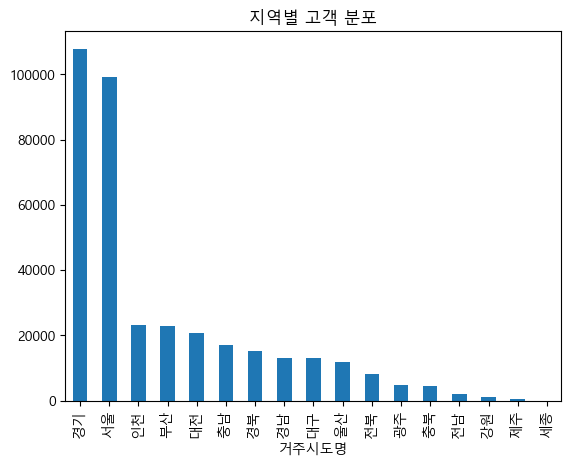

In [76]:
member['거주시도명'].value_counts().plot(kind='bar')
plt.title('지역별 고객 분포')
plt.show()

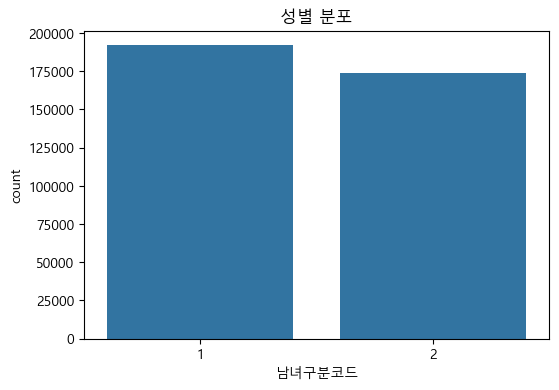

In [21]:
plt.figure(figsize=(6,4))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.countplot(x='남녀구분코드', data=member)
plt.title('성별 분포')
plt.show()  #남녀 분포도를 그래프로 해봄

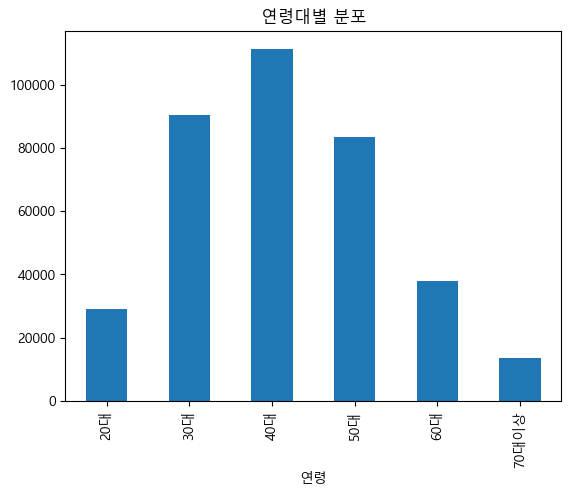

In [23]:
member['연령'].value_counts().sort_index().plot(kind='bar')
plt.title('연령대별 분포')
plt.show() #40대가 은행이용을 많이한다는 이론이 생김

In [25]:
vip_card = member.groupby('VIP등급코드')['소지카드수_유효_신용'].mean()
print("VIP 등급별 평균 카드 보유 수:", vip_card) #등급번호가 낮을수록 카드 보유수가 높

VIP 등급별 평균 카드 보유 수: VIP등급코드
04    2.188679
05    1.916667
06    1.830672
07    1.552194
_     1.145581
Name: 소지카드수_유효_신용, dtype: float64


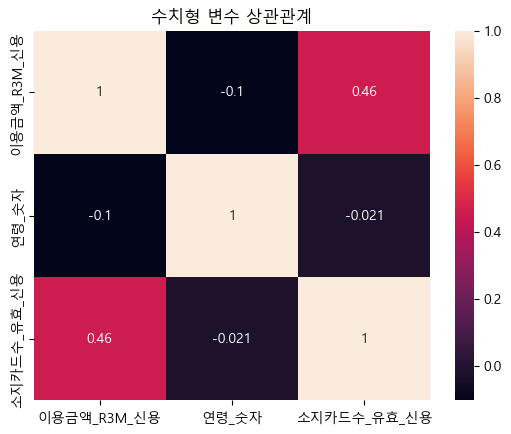

In [37]:
num_cols = ['이용금액_R3M_신용', '연령', '소지카드수_유효_신용']
cleaned_data = member[num_cols].dropna()

num_cols_number = ['이용금액_R3M_신용', '연령_숫자', '소지카드수_유효_신용']

def convert_age_to_numeric(age_str):
    if pd.isna(age_str):
        return None
    try:
        return int(age_str.replace('대', '')) * 1 
    except:
        return None #혹시 데이터가 이상하게 들어있을까봐


cleaned_data['연령_숫자'] = cleaned_data['연령'].apply(convert_age_to_numeric)

sns.heatmap(cleaned_data[num_cols_number].corr(), annot=True)
plt.title('수치형 변수 상관관계')
plt.show() #이용금액_R3M_신용', '연령', '소지카드수_유효_신용 3개의 상관계수를 구해

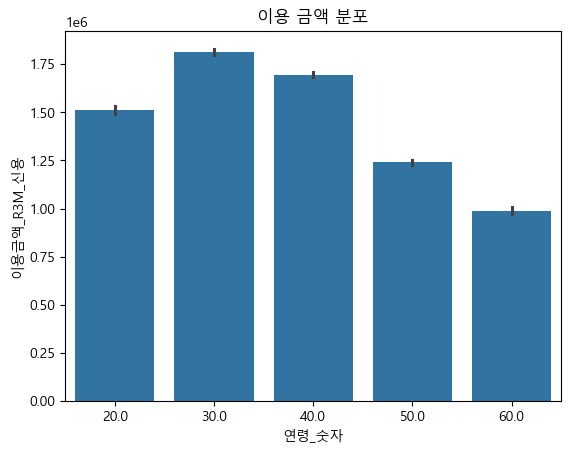

In [55]:
sns.barplot(x=cleaned_data['연령_숫자'], y ='이용금액_R3M_신용' , data = member)
plt.title('이용 금액 분포')
plt.show()

In [ ]:
churned = member[member['탈회횟수_누적'] > 0]
print("탈회 고객 평균 연령:", churned['연령'].mean())
print("탈회 고객 평균 카드 수:", churned['소지카드수_유효_신용'].mean())

In [57]:
life_stage = member.groupby('Life_Stage')['이용금액_R3M_신용'].agg(['mean', 'count'])
print("생애주기별 카드 이용 현황:\n", life_stage)

생애주기별 카드 이용 현황:
                     mean   count
Life_Stage                      
1.Single    1.411854e+06   13968
2.가족형성기     1.764747e+06   37202
3.자녀출산기     1.915675e+06   37599
4.자녀성장기(1)  1.748610e+06  121196
5.자녀성장기(2)  1.304351e+06   90062
6.자녀출가기     1.034399e+06   30238
7.노령        8.915546e+05   35686


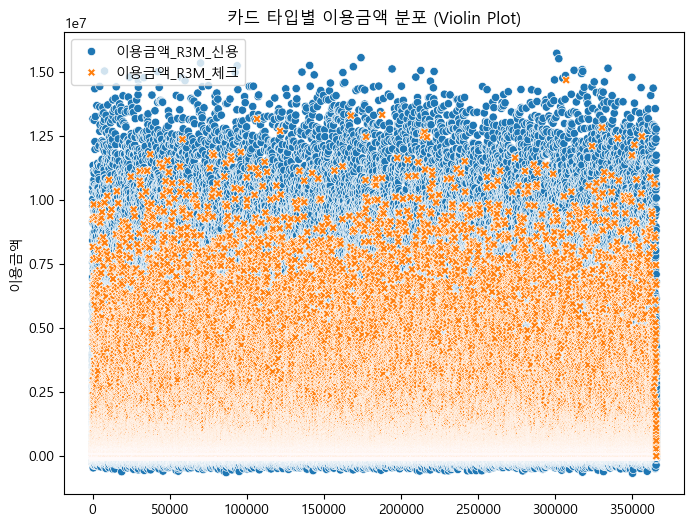

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=member[card_types])
plt.title('카드 타입별 이용금액 분포')
plt.ylabel('이용금액')
plt.show() #이용금액이 신용카드가 대체로 높다

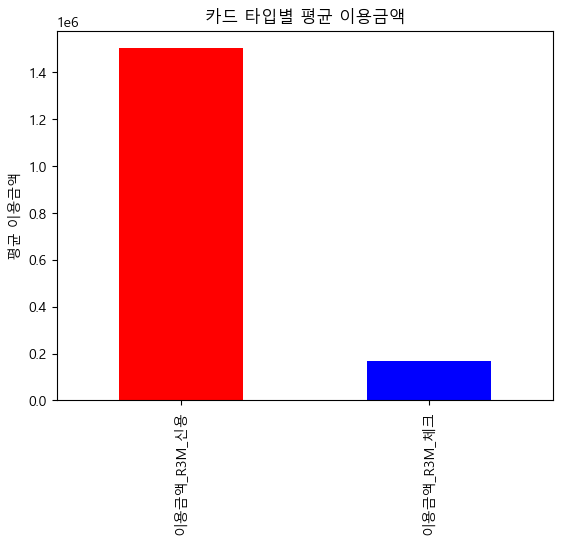

In [65]:
means = member[card_types].mean()
means.plot(kind='bar', color = ["red", "blue"])
plt.title('카드 타입별 평균 이용금액')
plt.ylabel('평균 이용금액')
plt.show() #신용카드 평균이 훨씬 많다는 결론을 얻음

In [72]:
delinq = member.groupby('회원여부_연체')['이용금액_R3M_신용'].mean()
print("연체 여부별 신용카드 평균 이용 금액:\n",delinq) #카드 연체와 이용금액은 상관이 없음

연체 여부별 신용카드 평균 이용 금액:
 회원여부_연체
0    1.502561e+06
1    1.507127e+06
Name: 이용금액_R3M_신용, dtype: float64


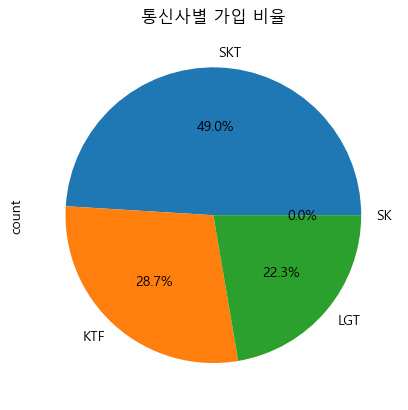

In [74]:
member['가입통신회사코드'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('통신사별 가입 비율')
plt.show() #SKT가 가장 많은 점유율을 갖고 있

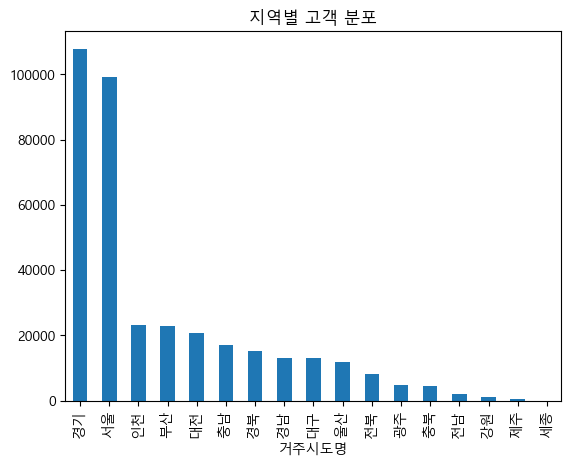

In [75]:
member['거주시도명'].value_counts().plot(kind='bar')
plt.title('지역별 고객 분포')
plt.show()

In [86]:
year_cols = ['기본연회비_B0M', '제휴연회비_B0M', '할인금액_기본연회비_B0M']
member[year_cols].describe().T[['mean', '50%', 'max', 'min']] #연회비의 컬럼의 특성 분성

,mean,50%,max,min
기본연회비_B0M,0.169140,0.0,10693.0,0.0
제휴연회비_B0M,2.181052,0.0,95003.0,0.0
할인금액_기본연회비_B0M,0.000000,0.0,0.0,0.0


In [97]:
overseas = member[member['이용여부_3M_해외겸용_본인'] > 0]

def convert_age_to_numeric(age_str):
    if pd.isna(age_str):
        return None
    try:
        return int(age_str.replace('대', '')) * 1 
    except:
        return None #혹시 데이터가 이상하게 들어있을까봐


overseas['연령_숫자'] = overseas['연령'].apply(convert_age_to_numeric)

print("해외 이용 고객 평균 연령:", overseas['연령_숫자'].mean())
print("해외 이용 고객 평균 이용 금액:", overseas['이용금액_R3M_신용'].mean())

해외 이용 고객 평균 연령: 39.66690926963903
해외 이용 고객 평균 이용 금액: 2061883.3091507487


In [99]:
new_cust = member[member['입회경과개월수_신용'] <= 12]
old_cust = member[member['입회경과개월수_신용'] > 12]
print("신규 고객 평균 카드 수:", new_cust['소지카드수_유효_신용'].mean())
print("기존 고객 평균 카드 수:", old_cust['소지카드수_유효_신용'].mean())
#신규가입자 및 기존 고객 비교

신규 고객 평균 카드 수: 1.0781050303717852
기존 고객 평균 카드 수: 1.280265933212966


In [100]:
rejected = member[member['이용거절여부_카드론'] == 1]
print("이용 거절 고객 비율:", len(rejected)/len(member)*100, "%")

이용 거절 고객 비율: 20.178329398391046 %


In [107]:
member['고객세그먼트'] = member['연령'].astype(str) + '_' + member['거주시도명']
print("고객 세그먼트 Top 5:\n", member['고객세그먼트'].value_counts().head())
#거주지랑 연령대를 묶어서 확인해봄 =>마케팅 자료로 좋겠다는 생각이 듬

고객 세그먼트 Top 5:
 고객세그먼트
40대_경기    34359
40대_서울    27542
30대_경기    26772
50대_경기    24420
30대_서울    23972
Name: count, dtype: int64


In [113]:
credit = pd.read_csv("./credit.csv")

In [115]:
from IPython.display import display, HTML


# HTML 테이블로 변환 후 스크롤 영역 지정
html = credit.head(100).to_html()
scrollable_html = f"""
<div style='height:400px; overflow:auto;'>
{html}
</div>
"""

display(HTML(scrollable_html))

,기준년월,발급회원번호,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,RV현금서비스이자율_할인전,RV신청일자,RV약정청구율,RV최소결제비율,자발한도감액횟수_R12M,자발한도감액금액_R12M,자발한도감액후경과월,강제한도감액횟수_R12M,강제한도감액금액_R12M,강제한도감액후경과월,한도증액횟수_R12M,한도증액금액_R12M,한도증액후경과월,상향가능한도금액,상향가능CA한도금액,카드론동의여부,월상환론상향가능한도금액,RV전환가능여부,일시불ONLY전환가능여부,카드이용한도금액_B1M,카드이용한도금액_B2M,특별한도보유여부_R3M,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
0,201812,SYN_0,0,1950765,579510,0,0,22.996722,18.561101,18.407185,21.203423,NaN,0.0,20.0,0,0,12,0,0,12,0,0,12,0,0,Y,0,N,0,2066559,2069011,0,0,0,0,3,3,0,0,0,0,99999999
1,201812,SYN_1,0,999717,423691,4233034,9275124,14.817037,15.521342,11.042597,13.656745,20180311.0,100.0,10.0,0,0,12,0,0,12,0,0,12,372,122,Y,0,Z,1,1000107,1000052,0,0,0,0,3,3,0,0,0,0,325
2,201812,SYN_2,0,8678806,3234446,4800186,15515708,14.220576,10.899239,10.250000,13.090622,NaN,0.0,10.0,0,0,12,0,0,12,0,0,12,894,285,Y,0,Z,1,7780154,7720190,0,0,0,0,3,3,0,0,0,0,99999999
3,201812,SYN_3,999660,4116755,1502578,8999945,20597941,14.850331,15.278039,10.883807,13.655359,20120628.0,100.0,10.0,0,0,12,0,0,12,0,0,12,641,201,Y,0,Z,1,3628163,3621685,0,0,0,0,3,3,0,0,0,0,2381
4,201812,SYN_4,0,484102,0,0,0,14.656909,14.852081,10.512856,13.285474,20120617.0,100.0,10.0,0,0,12,1,202,12,0,0,12,396,143,Y,0,N,0,482369,482983,0,0,0,0,3,3,0,0,0,0,2389
5,201812,SYN_5,0,1000172,418020,0,0,14.220000,10.900071,10.465204,13.132708,NaN,0.0,10.0,0,0,12,0,0,12,0,0,12,431,147,N,1800,Z,1,1000185,1000092,0,0,0,0,3,3,0,0,0,0,99999999
6,201812,SYN_6,0,1000305,435805,0,0,15.149071,15.298650,11.274920,14.495495,NaN,0.0,15.0,0,0,12,1,200,12,0,0,12,0,0,N,474,Z,1,1000248,1000236,0,0,0,0,3,3,0,0,0,0,99999999
7,201812,SYN_7,0,5391889,2735087,0,0,14.646554,14.837066,10.250000,13.299163,NaN,0.0,10.0,0,0,12,0,0,12,0,0,12,959,291,N,1800,Z,1,6903848,6847302,0,0,0,0,3,3,0,0,0,0,99999999
8,201812,SYN_8,0,4964542,1669810,4800189,15935899,14.856721,15.277766,11.180597,13.642410,NaN,0.0,10.0,0,0,12,0,0,12,1,190,8,582,199,Y,0,Z,1,5000196,5000198,0,0,0,0,3,3,0,0,0,0,99999999
9,201812,SYN_9,0,3000291,1192589,0,0,16.996854,16.289542,12.977753,16.214046,NaN,0.0,20.0,0,0,12,0,0,12,0,0,12,528,162,Y,0,Z,1,3000113,3000054,0,0,0,0,3,3,0,0,0,0,99999999


In [128]:
#피처명	설명
#기준년월	이 데이터를 기준으로 한 연월 (예: 2024년 6월이면 202406)
#최초한도금액	고객에게 처음 부여된 신용한도 금액
#카드이용한도금액	현재 고객이 사용 가능한 전체 카드 한도
#CA한도금액	CA (Cash Advance, 현금서비스) 한도 금액
#일시상환론한도금액	일시상환 방식 대출(론)의 한도 금액
#월상환론한도금액	월 단위로 나눠 상환하는 대출(분할상환 론)의 한도 금액
#CA이자율_할인전	현금서비스 이자율 (할인 적용 전 원래 이자율)
#CL이자율_할인전	일반 신용대출(CL: Credit Loan) 이자율 (할인 적용 전)
#RV일시불이자율_할인전	리볼빙 서비스 중, 일시불 사용금액에 적용되는 이자율 (할인 전)
#RV현금서비스이자율_할인전	리볼빙 현금서비스에 대한 이자율 (할인 전)
#연체감액여부_R3M	최근 3개월 내 연체로 인해 카드 한도가 감액된 적이 있는지 여부 (Y/N)
#한도심사요청건수	고객이 신용한도 상향을 요청한 횟수
#한도요청거절건수	위 요청 중 카드사에서 거절한 횟수
#한도심사요청후경과월	마지막 한도심사 요청 후 몇 개월이 지났는지
#한도심사거절후경과월	마지막 거절된 심사 후 경과된 개월 수
#시장단기연체여부_R6M	외부 금융기관 포함, 최근 6개월 내 단기 연체 여부 (Y/N)
#시장단기연체여부_R3M	최근 3개월 내 단기 연체 여부 (Y/N)
#시장연체상환여부_R6M	최근 6개월 내 연체 후 상환한 이력 여부 (Y/N)
#시장연체상환여부_R3M	최근 3개월 내 연체 후 상환한 이력 여부 (Y/N)
#rv최초시작후경과일	리볼빙 서비스를 처음 시작한 이후 경과된 일수

In [116]:
credit.describe()

,기준년월,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,RV현금서비스이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
count,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,3.000000e+06,3000000.0,3000000.0,3000000.0,3000000.0,3.000000e+06,3.000000e+06,3.000000e+06,3000000.0,3.000000e+06
mean,201812.0,3.617839e+05,5.122358e+06,1.704904e+06,3.306599e+06,9.359180e+06,1.600700e+01,1.484553e+01,1.197090e+01,1.474715e+01,...,5.557333e-03,0.0,0.0,3.0,3.0,1.833333e-05,3.666667e-06,3.333333e-07,0.0,8.140400e+07
std,0.0,1.034693e+06,4.671917e+06,1.468118e+06,5.116673e+06,8.490310e+06,2.377633e+00,2.721060e+00,2.222808e+00,2.734380e+00,...,7.434011e-02,0.0,0.0,0.0,0.0,4.281706e-03,1.914851e-03,5.773503e-04,0.0,3.890714e+07
min,201812.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.422000e+01,1.089365e+01,1.025000e+01,1.040000e+01,...,0.000000e+00,0.0,0.0,3.0,3.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,9.000000e+01
25%,201812.0,0.000000e+00,1.931745e+06,5.345948e+05,0.000000e+00,0.000000e+00,1.468648e+01,1.190075e+01,1.063465e+01,1.326869e+01,...,0.000000e+00,0.0,0.0,3.0,3.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+08
50%,201812.0,0.000000e+00,4.310044e+06,1.384388e+06,0.000000e+00,1.483475e+07,1.519848e+01,1.529248e+01,1.103383e+01,1.362061e+01,...,0.000000e+00,0.0,0.0,3.0,3.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+08
75%,201812.0,0.000000e+00,5.668796e+06,2.551268e+06,4.800568e+06,1.600254e+07,1.530560e+01,1.567513e+01,1.227357e+01,1.471084e+01,...,0.000000e+00,0.0,0.0,3.0,3.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+08
max,201812.0,4.816411e+06,2.531399e+07,6.841642e+06,2.000000e+07,2.500000e+07,2.300000e+01,2.300000e+01,2.005713e+01,2.300000e+01,...,1.000000e+00,0.0,0.0,3.0,3.0,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+08


In [118]:
missing = credit.isnull().sum()
print("결측치 현황:", missing[missing > 0])

결측치 현황: RV신청일자      2441297
RV전환가능여부      70810
dtype: int64


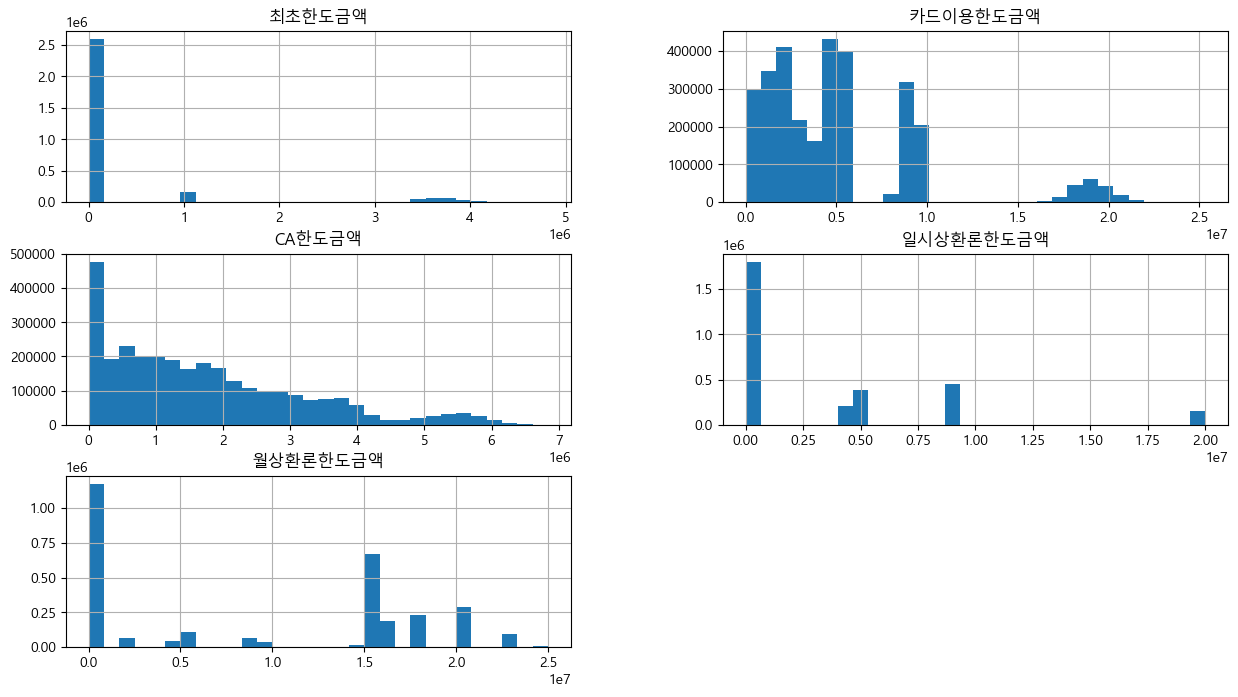

In [123]:
limit_cols = ['최초한도금액','카드이용한도금액','CA한도금액','일시상환론한도금액','월상환론한도금액']
credit[limit_cols].hist(bins=30, figsize=(15,8))
plt.show()

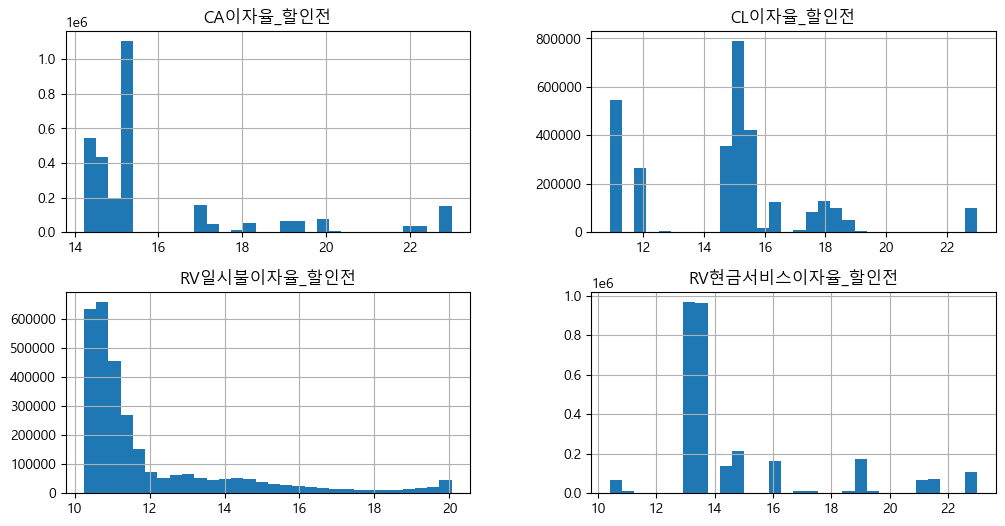

In [124]:
interest_cols = ['CA이자율_할인전','CL이자율_할인전','RV일시불이자율_할인전','RV현금서비스이자율_할인전']
credit[interest_cols].hist(bins=30, figsize=(12,6))
plt.show()

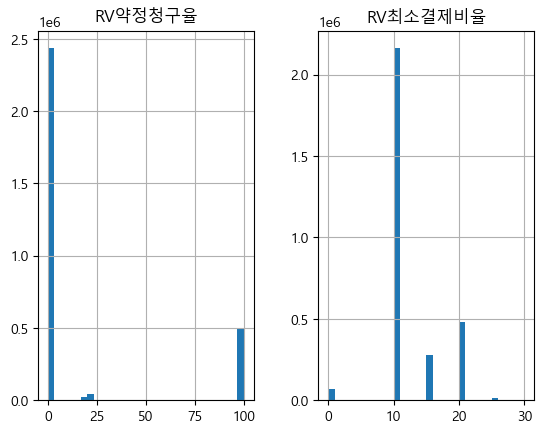

In [127]:
rv_cols = ['RV약정청구율','RV최소결제비율']
credit[rv_cols].hist(bins=30)
plt.show()